# Research on Ads for Car Sales

This Project is done for Crankshaft List. We have been granted access to Hundreds of free advertisements for vehicles that are published on our site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.


To work on this project I will break it down into the following steps:
1. General Information
2. Data Preprocessing
3. Calculation for new Columns
4. Exploratory Data Analysis
5. Overall Conclusion

**Description of the data**

- `price`: The amount the car was listed for
- `model_year`: The year the car was made 
- `model`: The make of the car
- `condition`: The state of the car when it was listed
- `cylinders`: Number of cylinders used by the car
- `fuel`: gas, diesel, etc.
- `odometer`: the vehicle's mileage when the ad was published
- `transmission`: whether it is automatic, manual, or something else
- `paint_color`: The color which the car is painted
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted`: the date the ad was published
- `days_listed`: from publication to removal


## General Information

Importing necessary libraries needed for this project

In [1]:
# importing needed libraries for the project

import pandas as pd
import matplotlib.pyplot as plt

Next, we load the data file to a variable and view the general information about it

In [2]:
# Load the data file into a DataFrame

data = pd.read_csv("/datasets/vehicles_us.csv")

In [3]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

data.head(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


The dataset has 13 rows and 51525 rows. Several columns have missing values, namely: model_year, cylinders, odometer, paint_color, and is_4wd.

The columns "is_4wd" is supposed to be boolean, and not float. Also "date_posted" needs to be changed from object to datetime.

In [5]:
#Checking the total number of Nan Values in "is_4wd"

data[data["is_4wd"].isna()].shape[0]

25953

In [6]:
#Checking the distribution of the "is_4wd" column

data["is_4wd"].value_counts(dropna=False)/data.shape[0]

NaN    0.503697
1.0    0.496303
Name: is_4wd, dtype: float64

Of the 13 columns in the dataset, there are missing values in 5 columns. "is_4wd" has the highest number of missing values, 25953. 

### Conclusions

The missing values in the column "is_4wd" is quite much. It fills more than half the rows in the column. That is not normal. 
The date_posted column is going to be fixed using the method to_datetime(). 

The data would be probed further to see what is wrong with the dataset, and how those missing values can be filled. 
To fill the missing values, I would check the attribute that affects the column with the missing values based on the distribution of the mean or median. 

If the standard deviation is high, that would indicate the presence of outliers. Then the missing values would be filled with the median, and not the mean. However, if the standard deviation is low, then I can use the mean to fill the missing values.


# Data Preprocessing

**Dealing with missing values in the "model_year" column**

In [7]:
#Getting the number of missing values in the "model_year" column
data["model_year"].isna().sum()

3619

The "model_year" column has 3619 missing values. To determine if the median or mean will be used in filling the missing values in the model_year, we use the decribe() method

In [8]:
data["model_year"].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

The standard deviation is low, so the mean would be used to fill the missing values in the "model_year" column. The attribute on which model_year depends on is "model". This is the columns that will be used to fill the missing values in "model_year".

In [9]:
data[["model","model_year"]].groupby("model").mean().reset_index()

,model,model_year
0,acura tl,2007.517857
1,bmw x5,2008.991870
2,buick enclave,2012.194553
3,cadillac escalade,2008.508475
4,chevrolet camaro,2008.397959
...,...,...
95,toyota sienna,2008.584416
96,toyota tacoma,2009.331599
97,toyota tundra,2009.350352
98,volkswagen jetta,2010.779381


In [10]:
#Filling the missing values in the model_year column

spurs = data[["model","model_year"]].groupby("model")["model_year"].transform('mean')

#Here, the transform() method is used to obtain all the null-fill values of the mean "model_year" column found 
# in "model" and stores it in spurs


data['model_year'].fillna(spurs, inplace=True)
# This line of code goes into the dataset, and fills all the missing values 

Getting a general information about the dataset to see if the null values in "model_year" have been filled

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Visualizing the first 5 rows after the "model_year" has been filled

In [12]:
#checking the first 5 rows of the dataset
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.000000,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.354702,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.000000,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.000000,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.000000,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [13]:
#Converting the "model_year" column from floats to integers

data["model_year"] = data["model_year"].astype("int")

**Dealing with missing values in the "odometer" column**

In [14]:
#Getting the number of missing parameters in the "odometer" column

data["odometer"].isna().sum()

7892

The "odometer" column has 7892 missing values.  We need to see if the median or mean should be used to the missing values. So, we check the numerical description of the column 

In [15]:
data["odometer"].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

The standard deviation is very high, this means that there are outliers in the dataset. Therefore, we have to use the median. However, we cannot use the global median of the "odometer" column to fill the missing values. We  have to locate attributes on which the "odometer" of a car depends. From our dataset, the "odometer" reading depends on "model_year". 

In [16]:
#Getting the value_counts of the "model_year" column
data['model_year'].value_counts()


2012    3817
2013    3706
2011    3701
2014    3497
2008    3489
        ... 
1936       1
1949       1
1954       1
1929       1
1961       1
Name: model_year, Length: 68, dtype: int64

We see that the "model_year" column has single values for several model_years. It can't be used like this, because a median() method cannot be performed on single values, and consequently can't used to fill the missing value in the odometer column. To use the model_years column, we have to bin the model_year column by creating a range of values using .qcut() method.

In [17]:
#Binning the model group, and assigning it to a variable "model_year_grp", where q = 10
data['model_year_grp'] = pd.qcut(data['model_year'], q=10)

In [18]:
#setting the parameter of q to q = 10
data['model_year_grp'].value_counts()

(2009.0, 2011.0]      6928
(2013.0, 2015.0]      6877
(1907.999, 2003.0]    6554
(2007.0, 2009.0]      6371
(2005.0, 2007.0]      5461
(2016.0, 2019.0]      5021
(2003.0, 2005.0]      3836
(2011.0, 2012.0]      3817
(2012.0, 2013.0]      3706
(2015.0, 2016.0]      2954
Name: model_year_grp, dtype: int64

In [19]:
data[["model_year_grp","odometer"]].groupby('model_year_grp')['odometer'].median().reset_index()

,model_year_grp,odometer
0,"(1907.999, 2003.0]",163000.0
1,"(2003.0, 2005.0]",154000.0
2,"(2005.0, 2007.0]",145000.0
3,"(2007.0, 2009.0]",135980.5
4,"(2009.0, 2011.0]",124196.5
5,"(2011.0, 2012.0]",110000.0
6,"(2012.0, 2013.0]",99766.0
7,"(2013.0, 2015.0]",84680.0
8,"(2015.0, 2016.0]",54000.0
9,"(2016.0, 2019.0]",30331.0


In [20]:
stats = data[["model_year_grp","odometer"]].groupby('model_year_grp')['odometer'].transform('median')

#Here, the transform() method is used to obtain all the null-fill values of the median odometer values found in
# in "model_year_grp" and stores it in stats


data['odometer'].fillna(stats, inplace=True)

In [21]:
#Checking the number of empty rows in the odometer column
data[data["odometer"].isnull()].shape[0]

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           51525 non-null  int64   
 1   model_year      51525 non-null  int64   
 2   model           51525 non-null  object  
 3   condition       51525 non-null  object  
 4   cylinders       46265 non-null  float64 
 5   fuel            51525 non-null  object  
 6   odometer        51525 non-null  float64 
 7   transmission    51525 non-null  object  
 8   type            51525 non-null  object  
 9   paint_color     42258 non-null  object  
 10  is_4wd          25572 non-null  float64 
 11  date_posted     51525 non-null  object  
 12  days_listed     51525 non-null  int64   
 13  model_year_grp  51525 non-null  category
dtypes: category(1), float64(3), int64(3), object(7)
memory usage: 5.2+ MB


There are no more missing values in the "odometer" column. 

**Dealing with missing values in the "is_4wd" column**

In [23]:
#Getting the parameters in the "is_4wd" column
data["is_4wd"].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

We need to convert this column to boolean variables, i.e True or False

In [24]:
data["is_4wd"] = data["is_4wd"].where(data["is_4wd"] == 1, 0)
#The where() parameter would be used to selectively rename all rows with 0 where the value is not equal to 1

#Converting the data type from numeric to boolean using astype() method
data["is_4wd"] = data["is_4wd"].astype("bool")

#Printing data["is_4wd"]
data["is_4wd"].value_counts()

#some_string = some_string.replace('leav', 'stay')

False    25953
True     25572
Name: is_4wd, dtype: int64

**Dealing with "type" column**

In [25]:
data["type"].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

The only problem with this column is that SUV is written in upper case letter. We would convert it to lower case, using the str.lower() method

In [26]:
data["type"] = data["type"].str.lower()

In [27]:
data["type"].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

**Dealing with missing values in "paint_color" column**

In [28]:
#Getting the number of missing values in the "paint_color" column

data["paint_color"].isna().sum()

9267

The "paint_color" column has 9267 missing values. The numerical description of the "paint_color" column gives

In [29]:
#Getting the numerical description of the column
data["paint_color"].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [30]:
data["paint_color"].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

The numerical description gives twelve unique values for the paint_color column. That tells us that the column is categorical, and there is no other data that can be used as a reference to fill the missing data in this column. So, the Nan values in this dataset will be replaced with "no info"

In [31]:
#Replacing Nan values with "no info"
data["paint_color"] = data["paint_color"].fillna("no info")

In [32]:
#Getting the count of each color and other parameters e.g "no info"
data["paint_color"].value_counts()

white      10029
no info     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

**Dealing with missing values in "cylinders" column**

In [33]:
#Getting the number of missing values in the "cylinders" column

data["cylinders"].isna().sum()

5260

In [34]:
data["cylinders"].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

The standard deviation is quite low, this means that there are few outliers in the dataset. However, we will use the median to fill the missing values. The attribute on which the cylinder of a car depends is the "model". 

In [35]:
#Checking the distribution of the median for the "cylinders" column in relation to the "model" column

data[["model","cylinders"]].groupby("model").median().reset_index()

,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


In [36]:
#Filling the missing values in the cylinders column
data["cylinders"] = data[["model","cylinders"]].groupby("model").transform(lambda x: x.fillna(x.median()))

In [37]:
data["cylinders"].isnull().sum()

0

In [38]:
#checking the information of the dataset to see if the missing values have all been filled

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           51525 non-null  int64   
 1   model_year      51525 non-null  int64   
 2   model           51525 non-null  object  
 3   condition       51525 non-null  object  
 4   cylinders       51525 non-null  float64 
 5   fuel            51525 non-null  object  
 6   odometer        51525 non-null  float64 
 7   transmission    51525 non-null  object  
 8   type            51525 non-null  object  
 9   paint_color     51525 non-null  object  
 10  is_4wd          51525 non-null  bool    
 11  date_posted     51525 non-null  object  
 12  days_listed     51525 non-null  int64   
 13  model_year_grp  51525 non-null  category
dtypes: bool(1), category(1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


All the missing values in the cylinders column have been filled.

The dataset has been checked and missing values have been filled. The "paint_color" column contained categorical variables, and the missing values could not be filled. So, those values were replaced with "no info". Other than the "paint_color" column, other columns that had missing values were filled based on columns that they were dependent on. They were filled with either the mean or median of those columns, depending on the standard deviation. 


**Fixing the "date_posted" cell**

This cell has object type values. However, it is supposed to be datetime. The to_datetime() method will be used to correct the discrepancy

In [39]:
#Correcting the issue with "date_posted" format 
data["date_posted"] = pd.to_datetime(data["date_posted"], format = "%Y-%m-%d")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  model_year_grp  51525 non-null  category      
dtypes: bool(1), category(1), datetime64[ns](1), float64(2)

The data_posted column has been corrected. It no longer reflects object, but datetime

**Conclusion**


The columns have been changed to the appropriate types, missing values have been filled for all the columns.

## Calculation for New Columns

**Creating columns for weekday, month, and year**

To make our analysis easier, we would add some columns into our dataset: data[day], data[month], data[year], using the attributes: dt.day for days of the week, dt.month for months of the year, dt.year for the year. 

In [41]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grp
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,no info,True,2018-06-23,19,"(2009.0, 2011.0]"
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"(2007.0, 2009.0]"
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"(2012.0, 2013.0]"
3,1500,2003,ford f-150,fair,8.0,gas,163000.0,automatic,pickup,no info,False,2019-03-22,9,"(1907.999, 2003.0]"
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"(2016.0, 2019.0]"


In [42]:
# Adding datetime values for when the ad was placed

data["day"] = data["date_posted"].dt.day_name()

data["month"] = data["date_posted"].dt.month

data["year"] = data["date_posted"].dt.year

In [43]:
data.head(5)
#Note for the days, 0 = Moday, 6 = sunday. 06-23-2018, was saturday. That is why the system gave 5.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grp,day,month,year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,no info,True,2018-06-23,19,"(2009.0, 2011.0]",Saturday,6,2018
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"(2007.0, 2009.0]",Friday,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"(2012.0, 2013.0]",Thursday,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,163000.0,automatic,pickup,no info,False,2019-03-22,9,"(1907.999, 2003.0]",Friday,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"(2016.0, 2019.0]",Tuesday,4,2019


**Age of the Vehicle**

In [44]:
# Adding the vehicle's age which shows when the ad was placed
data["vehicle_age_ad"] = data["year"] - data["model_year"] + 1
# +1 was added to the age of the vehicles, because some cars had 0 years after calculating data["vehicle_age_ad"] 

data["vehicle_age_ad"] = data["vehicle_age_ad"].astype("int")

data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grp,day,month,year,vehicle_age_ad
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,no info,True,2018-06-23,19,"(2009.0, 2011.0]",Saturday,6,2018,8
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"(2007.0, 2009.0]",Friday,10,2018,10
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"(2012.0, 2013.0]",Thursday,2,2019,7
3,1500,2003,ford f-150,fair,8.0,gas,163000.0,automatic,pickup,no info,False,2019-03-22,9,"(1907.999, 2003.0]",Friday,3,2019,17
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"(2016.0, 2019.0]",Tuesday,4,2019,3


**Average mileage of the vehicle per year**

In [45]:
# Add the vehicle's average mileage per year

data["yearly_avg_milg"] = data["odometer"] / data["vehicle_age_ad"]

**Replacing values in "condition" column**

To selectively replace the string values in the condition column with numeric values, we use the where() method. The values will be replaced as:  'salvage' = 0, 'fair' = 1, 'good' = 2, 'excellent' = 3, 'like new' = 4, and 'new' = 5.

In [46]:
#selectively renaming the condition column using the where() method

data["condition"] = data["condition"].where(data["condition"] != "salvage", 0)

data["condition"] = data["condition"].where(data["condition"] != "fair", 1)

data["condition"] = data["condition"].where(data["condition"] != "good", 2)

data["condition"] = data["condition"].where(data["condition"] != "excellent", 3)

data["condition"] = data["condition"].where(data["condition"] != "like new", 4)

data["condition"] = data["condition"].where(data["condition"] != "new", 5)





In [47]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grp,day,month,year,vehicle_age_ad,yearly_avg_milg
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,suv,no info,True,2018-06-23,19,"(2009.0, 2011.0]",Saturday,6,2018,8,18125.000000
1,25500,2009,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,"(2007.0, 2009.0]",Friday,10,2018,10,8870.500000
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,"(2012.0, 2013.0]",Thursday,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,163000.0,automatic,pickup,no info,False,2019-03-22,9,"(1907.999, 2003.0]",Friday,3,2019,17,9588.235294
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,"(2016.0, 2019.0]",Tuesday,4,2019,3,26967.666667


In [48]:
#Changing dtypes for the columns cylinders, odometer, yearly_avg_milg

data["cylinders"] = data["cylinders"].astype("int")
data["odometer"] = data["odometer"].astype("int")
data["yearly_avg_milg"] = data["yearly_avg_milg"].astype("int")

#Deleting model_year_grp

del data["model_year_grp"]


## Exploratory Data Analysis

In [49]:
# printing the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  int64         
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day              51525 non-null  object        
 14  month            51525 non-null  int64

In [50]:
# print a sample of data
data.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age_ad,yearly_avg_milg
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,no info,True,2018-06-23,19,Saturday,6,2018,8,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,163000,automatic,pickup,no info,False,2019-03-22,9,Friday,3,2019,17,9588
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,3,26967


The parameters below would be studied closely

- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

We would plot Histograms for each of these parameters to see how outliers affect their forms and readability 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

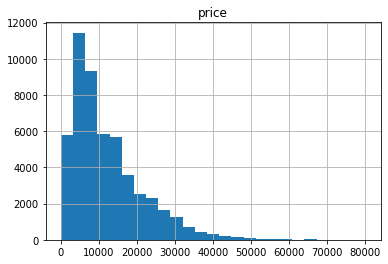

In [51]:
#Plotting an Histogram for the Price of the cars 

data.hist("price", bins = 25, range = (0,80000))


In [52]:
#Checking the maximun price of the car
data["price"].max()

375000

From our histogram, we see that minimum price of a car is 0. we see that quite a number of cars had their prices listed as 0. These values will be treated as outliers, and would be removed. Also, above 50,000 the number of cars thinned out. The Central Limit Theorem would be used to determine the upper limit, and lower limit, to determine the outlier values that will be taken out.

111

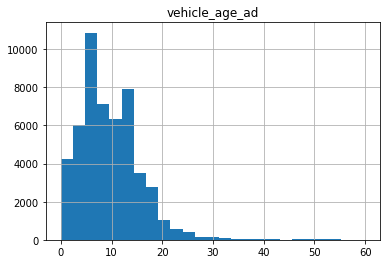

In [53]:
#Plotting an Histogram for the vehicle's age when the ad was placed

data.hist("vehicle_age_ad",bins = 25, range = (0, 60))

#To check the maximun age of the vehicle when the ad was placed
data["vehicle_age_ad"].max() 


We can see from the Histogram that after 30 years of age there are almost no vehicles that are listed as at when the ad was placed. The Central Limit Theorem would be used to determine the upper limit, to determine the outlier values that will be taken out. The lowere limit would be left at 0

373200

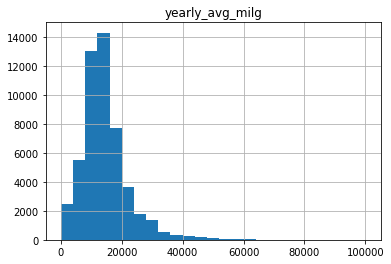

In [54]:
#Plotting a Histogram for the Mileage of the Car

data.hist("yearly_avg_milg", bins = 25, range = (0, 100000))

#To check the maximum mileage reading when the ad was placed
data["yearly_avg_milg"].max() 




In [55]:
#Getting the number of mileage reading that is greater than 100000
data[data["yearly_avg_milg"] > 100000].shape[0]

20

The highest mileage reading of a car as at when the ad was placed is 373200. However, from the Histogram, we visualized just values from 0 to 100000. That is because we wanted to have a good view of the graph. We see that out of the 51525 values in the dataset, only 20 values in this column have a mileage reading that is higher than 100,000. That number is quite small compared to the whole dataset. Moreover they are outliers. Hence, the reason they are not included in the Histogram. The Central Limit Theorem would be used to determine the upper limit, to determine the outlier values that will be taken out. The lower limit would be left at 0

12

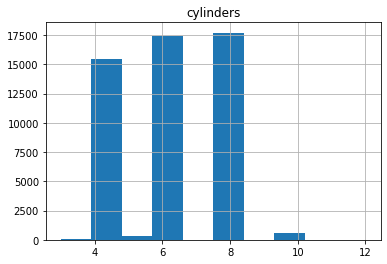

In [56]:
#Plotting an Histogram for Number of cylinders of the Car

data.hist("cylinders", bins = 10,)

#To check the maximun age of the vehicle when the ad was placed
data["cylinders"].max() 




The car models with 8 cylinders have the highest number of listing when the ad was placed. Next are car models with 6, then 4. Those 3 cylinders have the least listing.

Text(0.5, 1.0, 'condition')

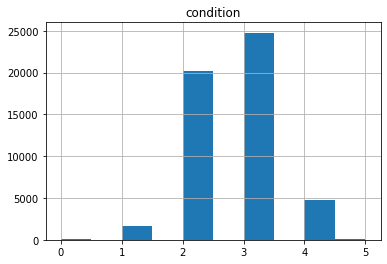

In [57]:
#Plotting an Histogram for the condition of the cars 

data["condition"].hist(bins= 10)
plt.title("condition")




The condition of the vehicles is highest  at 3, next is 2, then 4. The lowest is 0

## Study and treat outliers
We would study outlier values in these columns: "price", "yearly_avg_milg", "vehicle_age_ad". Then the 3-sigma rule will be used to take out the outliers. We would be using 3-standard deviations from the mean.

**Lower limit and Upper Limit for Price**

Getting the statistical information for "price" column

In [58]:
data["price"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [59]:
#calculating the mean separately
mean_value = data["price"].mean()
mean_value

12132.464919941776

In [60]:
#calclulating the standard deviation separately
stan_dev = data["price"].std()
stan_dev


10040.803015443298

In [61]:
#setting the upper limit, and the lower limit of price
price_upper_limit = mean_value + 3*stan_dev

price_lower_limit = mean_value - stan_dev

In [62]:
print("upper_limit", price_upper_limit)
print("lower_limit", price_lower_limit)

upper_limit 42254.87396627167
lower_limit 2091.661904498478


In [63]:
data[data["price"] > 42254].shape[0]

619

In [64]:
data[data["price"]< 2091].shape[0]

2918

3- standard deviations were used for the upper limit for "price". This gave an upper limit of 42254, thereby, filtering out 619 outlier values. However, 1-standard deviation was used for the lower limit. This is because 3-standard deviations from the mean for the lower limit gave negative values, and our dataset does not have negative price values. 
However, using 1-standard deviation, gave a lower limit of 2091. Thereby filtering out 2918 outlier values

**Lower limit and Upper Limit for Mileage**

Getting the statistical information for "yearly_avg_milg" column

In [65]:
data["yearly_avg_milg"].describe()

count     51525.000000
mean      14422.075478
std        8650.748413
min           0.000000
25%        9722.000000
50%       13214.000000
75%       17147.000000
max      373200.000000
Name: yearly_avg_milg, dtype: float64

In [66]:
#calculating the mean separately
mean_value = data["yearly_avg_milg"].mean()
mean_value

14422.075477923338

In [67]:
#calclulating the standard deviation separately
stan_dev = data["yearly_avg_milg"].std()
stan_dev

8650.748413137206

In [68]:
#setting the upper limit for the odometer column
price_upper_limit = mean_value + 3*stan_dev


In [69]:
print("upper_limit", price_upper_limit)


upper_limit 40374.32071733496


In [70]:
data[data["yearly_avg_milg"] > 40374].shape[0]

730

3- standard deviations were used for the upper limit for "price". This gave an upper limit of 40374, thereby, filtering out 730 outlier values. However, the lower limit was left to be 0. Seeing that from the statistical information given for the mileage of the cars, the minimum value given is 0. Which is most likely for cars that are brand new. Therefore, the lower limit for the mileage of the cars is set to 0.

**Lower limit and Upper Limit for vehicle_age_ad**

Getting the statistical information for "vehicle_age_ad" column

In [71]:
data["vehicle_age_ad"].describe()

count    51525.000000
mean         9.596545
std          6.113648
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: vehicle_age_ad, dtype: float64

In [72]:
#calclulating the mean and the standard deviation separately of vehicle_age_ad
mean_value = data["vehicle_age_ad"].mean()

stan_dev = data["vehicle_age_ad"].std()

print(mean_value)

print(stan_dev)


9.596545366327026
6.113648497259851


In [73]:
#setting the upper limit, and the lower limit of vehicle_age_ad
price_upper_limit = mean_value + 3*stan_dev

price_lower_limit = 0

In [74]:
print("upper_limit", price_upper_limit)
print("lower_limit", price_lower_limit)

upper_limit 27.937490858106578
lower_limit 0


In [75]:
data[data["vehicle_age_ad"] > 27.93].shape[0]

558

Similar to the "yearly_avg_milg" column, the min age for a car when it was listed is 0. Therefore, the lower limit is set to 0, and the upper limit is set to 27.98. Thereby, filtering out 558 values

In [76]:
# The upper limits for outliers

upper_outliers = data.query('price > 42254 & yearly_avg_milg > 40374 & vehicle_age_ad > 27.93')

#All the values above 42254 for price, 40374 for the yearly_avg_milg, and 27.93 for vehicle_age_ad are treated as upper limit
#outlier values and are stored in the variable upper_outliers



In [77]:
# To store data without outliers in a separate DataFrame

non_outlier_data = data.query('2091 < price < 42254 & yearly_avg_milg < 40374 & vehicle_age_ad < 27.93')

#All the values for price between 2091, and 42254, below 42254 for the mileage, and 27.93 for vehicle_age_ad 
#are treated as data without outlier values and are stored in non_outlier_data

In [78]:
non_outlier_data.info()
non_outlier_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46842 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            46842 non-null  int64         
 1   model_year       46842 non-null  int64         
 2   model            46842 non-null  object        
 3   condition        46842 non-null  object        
 4   cylinders        46842 non-null  int64         
 5   fuel             46842 non-null  object        
 6   odometer         46842 non-null  int64         
 7   transmission     46842 non-null  object        
 8   type             46842 non-null  object        
 9   paint_color      46842 non-null  object        
 10  is_4wd           46842 non-null  bool          
 11  date_posted      46842 non-null  datetime64[ns]
 12  days_listed      46842 non-null  int64         
 13  day              46842 non-null  object        
 14  month            46842 non-null  int64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age_ad,yearly_avg_milg
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,no info,True,2018-06-23,19,Saturday,6,2018,8,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,7,15714
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,3,26967
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018,5,11590


## Plotting Histograms based on our filtered datasets 

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

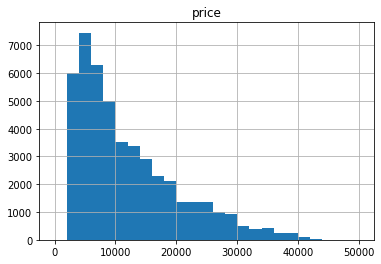

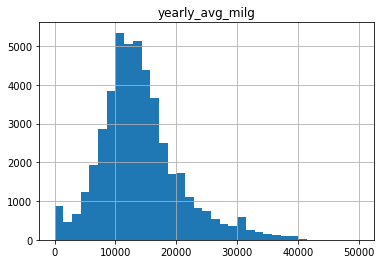

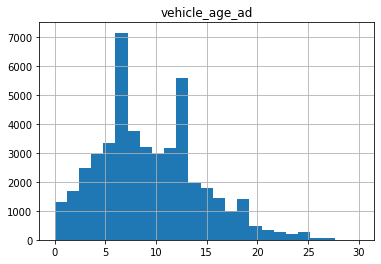

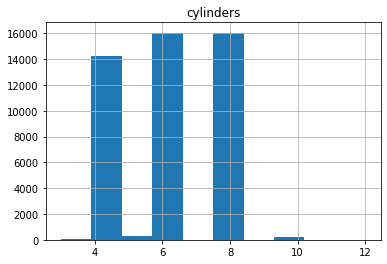

In [79]:
#Plotting Histograms for the same paramters, however, for the filtered dataset without outliers 

non_outlier_data.hist("price", bins = 25, range = (0,50000))

non_outlier_data.hist("yearly_avg_milg", bins = 35, range = (0,50000))

non_outlier_data.hist("vehicle_age_ad", bins = 25, range = (0,30))

non_outlier_data.hist("cylinders", bins = 10)


Text(0.5, 1.0, 'condition')

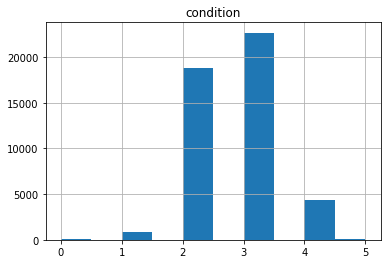

In [80]:
non_outlier_data["condition"].hist(bins= 10)
plt.title("condition")

The price of the Histogram in the filtered dataset starts at approximately 2100, and peaks at 5000. However, in the unfiltered dataset, it starts at 0. Beyond the peak the peak price of 5000 in the filtered dataset the price declines sharply till it gets to 10000. After which the price declines steadily till 42255. The Histogram that represents the filtered dataset of the average mileage starts at 0, and has a sharp increase till it gets to a maximum at 10000, and has a sharp decline till 20000. After which the decline was steady till 40375. 
For the vehicle_age_ad column, the filtered dataset has three peaks at 7, 12, and a small peak at 18 which is not evident in the unfiltered dataset.
Generally, the histograms for the filtered dataset have more noise than the original dataset, because some datasets have been taken out, being outliers. Also, the tails are gone. However, they have the same peaks.

## Investigating "days_listed" column

First, we study the number of days that the adverts were displayed, then find the mean, median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [81]:
non_outlier_data["days_listed"].describe()

count    46842.000000
mean        39.573310
std         28.241999
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean is about 39 days, and the median is about 33. Plotting the Histogram for "days_listed"

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

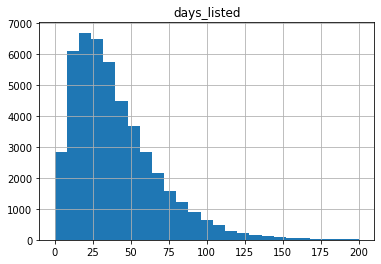

In [82]:
non_outlier_data.hist("days_listed", bins = 25, range = (0,200))

To see the lifetime of an ad we use a boxplot

<AxesSubplot:>

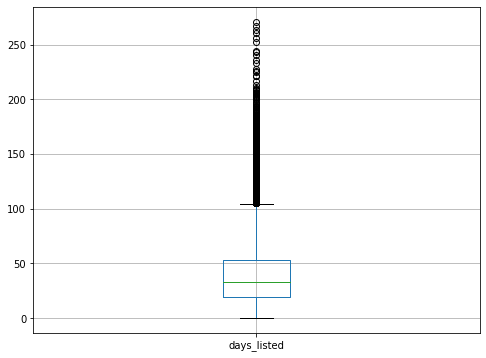

In [83]:
non_outlier_data.boxplot(column = "days_listed", figsize = (8, 6))

From the boxplot above, a typical ad is listed around 18 to 52 days. Ads that are listed above 100 days are those that are listed for an abnormally long period of time. All the values between 0 and 18 are those ads that were taken down quickly

In [84]:
data.head(4)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age_ad,yearly_avg_milg
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,no info,True,2018-06-23,19,Saturday,6,2018,8,18125
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,163000,automatic,pickup,no info,False,2019-03-22,9,Friday,3,2019,17,9588


## Average price per each type of vehicle

To analyze the number of ads, we would show the different types of cars and the median price for each type of vehicle using we use a pivot table. 

In [85]:
type_price_ad = non_outlier_data.pivot_table(index = "type", values = "price", aggfunc = "median").reset_index()

type_price_ad

,type,price
0,bus,10500
1,convertible,12980
2,coupe,14995
3,hatchback,6000
4,mini-van,6900
5,offroad,12500
6,other,8995
7,pickup,14500
8,sedan,6495
9,suv,8995


In [86]:
#Viewing the number of ads for all the types of cars
type_ad_counts = non_outlier_data["type"].value_counts()

type_ad_counts

suv            11374
truck          11227
sedan          10981
pickup          6506
coupe           1929
wagon           1459
mini-van        1063
hatchback        953
van              568
convertible      348
other            224
offroad          187
bus               23
Name: type, dtype: int64

In [87]:
#converting type_ad_counts to a DataFrame, and changing the column names
type_ad_counts = type_ad_counts.reset_index()
type_ad_counts.columns = ['type','count']
type_ad_counts

,type,count
0,suv,11374
1,truck,11227
2,sedan,10981
3,pickup,6506
4,coupe,1929
5,wagon,1459
6,mini-van,1063
7,hatchback,953
8,van,568
9,convertible,348


To view the number of ads placed and the average price of each vehicle, we merge the variables using the merge() method

In [88]:
#viewing the number of ads placed, and the average price of each vehicle
no_of_ads_price = pd.merge(type_price_ad,type_ad_counts,how='left' )

#sorting the values by the count
no_of_ads_price = no_of_ads_price.sort_values("count", ascending = False)

In [89]:
no_of_ads_price 

,type,price,count
9,suv,8995,11374
10,truck,14995,11227
8,sedan,6495,10981
7,pickup,14500,6506
2,coupe,14995,1929
12,wagon,7995,1459
4,mini-van,6900,1063
3,hatchback,6000,953
11,van,7999,568
1,convertible,12980,348


<AxesSubplot:xlabel='type'>

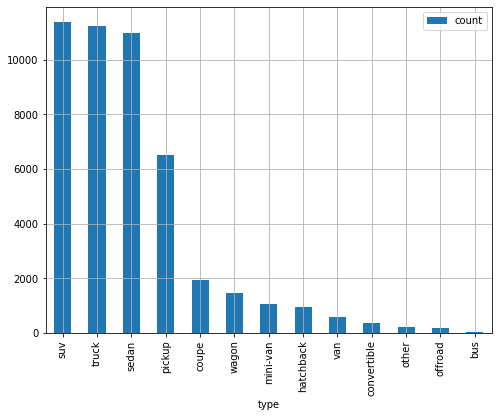

In [90]:
no_of_ads_price.plot(x= "type", y = "count", grid = True, figsize =(8,6), kind = "bar")

The most popular cars that were listed are SUVs and Trucks and Sedan

## Price factors

To determine the factors that impact the price most, we would study two of the three cars that have the highest number of ads. For these type of cars, we wil create a slice, and check whether the price depends on age, mileage, condition, transmission type, or color. For categorical variables (transmission type and color), we use plot box-and-whisker charts, and create scatterplots for the rest. 

In [91]:
#slice our dataset, and deal with SUVs first
data_suv = non_outlier_data.query('type == "suv"')

#selecting the columns that are to be dealt with for the suvs and how they affect price
data_suv = data_suv[["price", "yearly_avg_milg", "vehicle_age_ad","condition", "transmission", "paint_color"]]

In [92]:
data_suv.head(5)

,price,yearly_avg_milg,vehicle_age_ad,condition,transmission,paint_color
0,9400,18125,8,2,automatic,no info
7,15990,15639,7,3,automatic,black
8,11500,14882,7,3,automatic,no info
9,9200,12265,12,3,automatic,blue
14,12990,12025,11,3,automatic,black


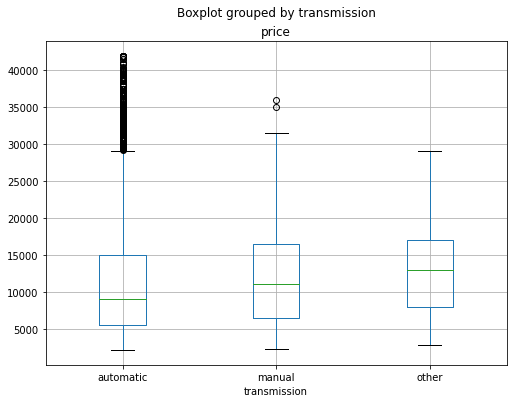

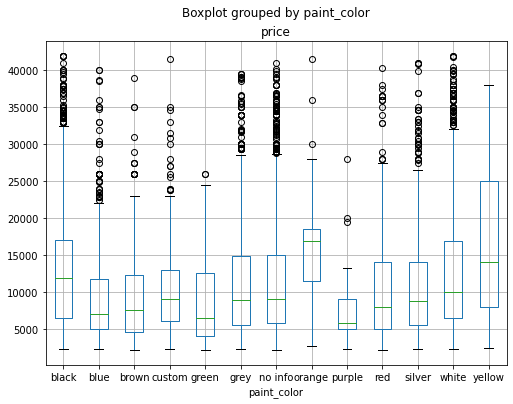

In [94]:
#Creating a boxplot for the transmission and paint_color columns
for sho in data_suv.columns:
    if (sho == "transmission") or (sho =="paint_color"):
        data_suv.boxplot(column = "price", by = sho, figsize = (8, 6))


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='yearly_avg_milg'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='yearly_avg_milg'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='yearly_avg_milg'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age_ad'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='vehicle_age_ad'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='vehicle_age_ad'>]],
      dtype=object)

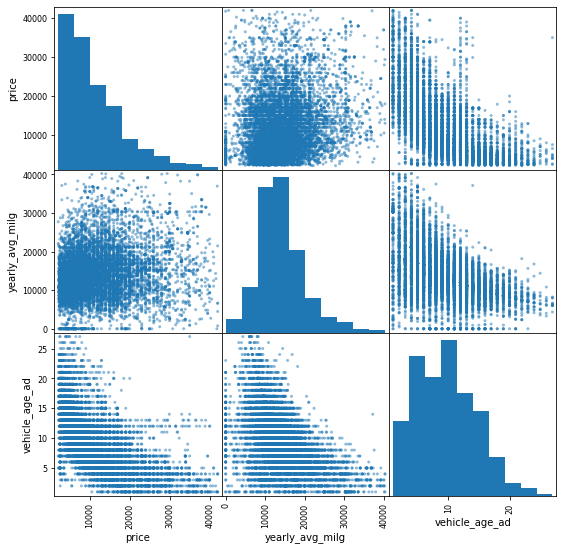

In [95]:
# Showing a correlation plot for the Price, Mileage, condition and vehicle_age ad columns

pd.plotting.scatter_matrix(data_suv, figsize=(9, 9))

Using a correlation matrix to show the relationship between price and other variables. A value close to -1 or 1 shows a strong relationship between the variables. However, a value close to 0 indicates little to no correlation at all.

In [96]:
#Plotting the correlation Matrix

data_suv.corr()

,price,yearly_avg_milg,vehicle_age_ad
price,1.000000,0.193616,-0.639043
yearly_avg_milg,0.193616,1.000000,-0.516610
vehicle_age_ad,-0.639043,-0.516610,1.000000


From the correlation matrix, the age is the factor that impacts price the most. Taking a look at the boxplots, yellow SUVs and SUVs with other transmissions have higher typical prices in their respective categories. 

**Taking a look at Sedans**

In [99]:
#slice our dataset, and deal with SUVs first
data_sedan= non_outlier_data.query('type == "sedan"')

#selecting the columns that are to be dealt with for the suvs and how they affect price
data_sedan = data_sedan[["price", "yearly_avg_milg", "vehicle_age_ad","condition", "transmission", "paint_color"]]

In [100]:
data_sedan.head(5)

,price,yearly_avg_milg,vehicle_age_ad,condition,transmission,paint_color
2,5500,15714,7,4,automatic,red
4,14900,26967,3,3,automatic,black
5,14990,11590,5,3,automatic,black
6,12990,19803,4,3,automatic,white
11,8990,13892,8,3,automatic,grey


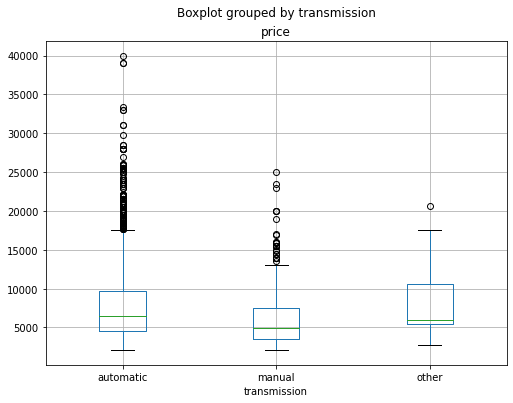

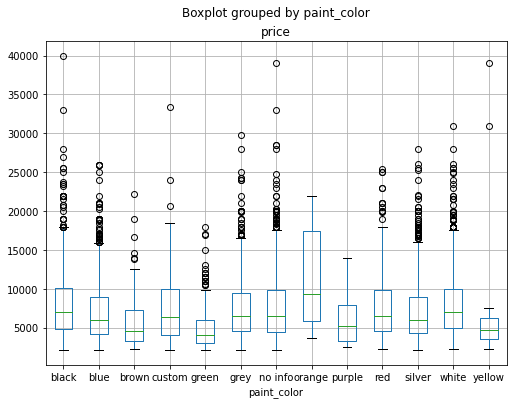

In [101]:
for ref in data_sedan.columns:
    if(ref == "transmission") or (ref == "paint_color"):
        data_sedan.boxplot(column = "price", by = ref, figsize = (8, 6))
    

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='yearly_avg_milg'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='yearly_avg_milg'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='yearly_avg_milg'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age_ad'>,
        <AxesSubplot:xlabel='yearly_avg_milg', ylabel='vehicle_age_ad'>,
        <AxesSubplot:xlabel='vehicle_age_ad', ylabel='vehicle_age_ad'>]],
      dtype=object)

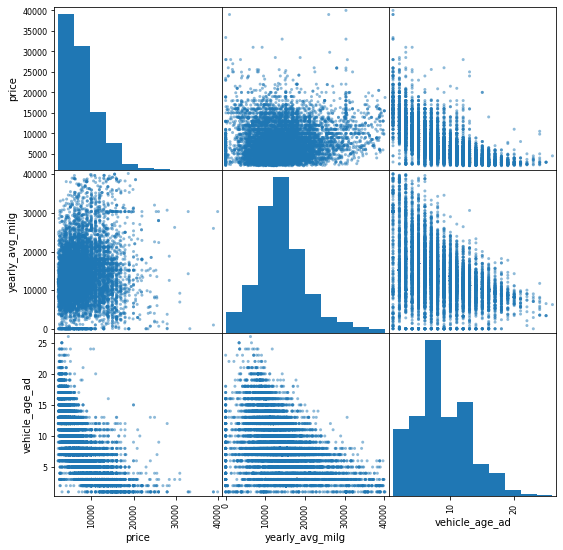

In [102]:
# Showing a correlation plot for the Price, Mileage, condition and vehicle_age ad columns

pd.plotting.scatter_matrix(data_sedan, figsize=(9, 9))

In [103]:
#Plotting the correlation Matrix

data_sedan.corr()

,price,yearly_avg_milg,vehicle_age_ad
price,1.000000,0.143919,-0.672958
yearly_avg_milg,0.143919,1.000000,-0.456312
vehicle_age_ad,-0.672958,-0.456312,1.000000


From the correlation matrix, the age still has the strongest correlation with price (although correlation is negative). From the box plots, orange sedans and sedans with other transmissions have the highest typical prices in their respective categories

## General conclusion

This Project was done as a research on the adverts for car sales from CrankShaft List. The dataset was preprocessed and missing values were filled with either the mean or the median of the columns that they were dependent on. After the missing values were filled, the dataset was filtered with upper limits and lower limits using the 3-sigma rule. The lower limit for "yearly_avg_milg" and "vehicle_age_ad" was set at 0. However, the lower limit for the "price" was set at one-standard deviation from the mean. Histograms were plotted for the original dataset and the filtered data. The typical ad lasts between 19 and 50 days, and those lasting more than 100 days are abnormally long. Of the three types of vehicles that had the highest number of ads, we studied two of them, namely: SUVs, and Sedan. The data of these two types of vehicles were used to create boxplots, scatterplots, and correlation matrices. From those, we came to the conclusion that the factor that impacts price the most is age, followed by mileage. We also saw that for SUVs, yellow was the color with the highest typical prices, and SUVs with other transmission types edge out both automatic and manual transmisson for price. For Sedans (the third most popular type in our dataset), orange was the color that drove up typical prices, and sedans with other transmission types had more influence on price than sedans with manual, or automatic transmissions.